# Beispiel für Handschriftenerkennung
Quelle:Tariq Rashid, 2016


In [1]:
import numpy,math
import scipy.special
import matplotlib.pyplot as plt
# ensure the plots are inside this notebook, not an external window
%matplotlib inline

### Aufbau eines Netzes mit drei Schichten 

In [2]:
# neural network class definition
class neuralNetwork:    
    
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes        
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        self.lr = learningrate
        self.activation_function = lambda x: scipy.special.expit(x)
  
    # train the neural network
    def train(self, inputs_list, targets_list):        
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T        
        hidden_inputs = numpy.dot(self.wih, inputs)        
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)        
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
    # query the neural network
    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin=2).T        
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)        
        return final_outputs

In [3]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10
# learning rate
learning_rate = 0.1
# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

## Training mit einem Datensatz aus 100 Zahlen
Durchlaufen werden einige Epochen

In [4]:
# load the mnist training data CSV file into a list
training_data_file = open("mnist_dataset/mnist_train_100.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()
# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 10

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)

# Test des Netzwerkes mit Testdatensätzen

Label: 9  richtig:  9
Label: 2  richtig:  2
Label: 1  richtig:  1
Label: 3  richtig:  3
Label: 1  richtig:  1
Label: 4  richtig:  4
Label: 3  richtig:  3
Label: 5  richtig:  5
Label: 3  richtig:  3


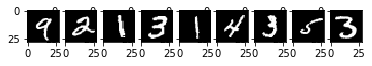

In [5]:
# test the neural network
test_data_file = open("mnist_dataset/mnist_test_2_10.csv", 'r')
test_data_list = test_data_file.readlines()[:9]
anzahl=len(test_data_list)
test_data_file.close()
scorecard = []
bilder=[]
# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
   
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    punktliste=[]    
    for l in range(28):
        zeile=[]
        for k in range(28):
            zeile.append(int(all_values[l*28+k]))
        punktliste.append(zeile)
    bilder.append(punktliste)
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    print("Label:",label," richtig: ",correct_label)
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
if anzahl<10:
        plotNr=100+anzahl*10+1
    
        plt.figure(figsize=(6, 1))
        for bild in bilder:    
            plt.subplot(plotNr)
            plotNr+=1        
            plt.imshow(bild, cmap = 'gray')
        plt.show()
    

In [6]:
# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  1.0
